In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftfreq, irfft, dct, idct, fft2, ifft2
import cv2
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir_path = './data/drop-211025-2'
img_path_list = [dir_path+'/'+ f for f in os.listdir(dir_path) if f.endswith('.jpg')]
img_path_list.sort()
img_path_list

['./data/drop-211025-2/drop-010.jpg',
 './data/drop-211025-2/drop-020.jpg',
 './data/drop-211025-2/drop-030.jpg',
 './data/drop-211025-2/drop-040.jpg',
 './data/drop-211025-2/drop-050.jpg',
 './data/drop-211025-2/drop-060.jpg',
 './data/drop-211025-2/drop-070.jpg',
 './data/drop-211025-2/drop-080.jpg',
 './data/drop-211025-2/drop-090.jpg',
 './data/drop-211025-2/drop-100.jpg',
 './data/drop-211025-2/drop-110.jpg',
 './data/drop-211025-2/drop-120.jpg',
 './data/drop-211025-2/drop-130.jpg',
 './data/drop-211025-2/drop-140.jpg',
 './data/drop-211025-2/drop-150.jpg',
 './data/drop-211025-2/drop-160.jpg',
 './data/drop-211025-2/drop-170.jpg',
 './data/drop-211025-2/drop-180.jpg',
 './data/drop-211025-2/drop-190.jpg',
 './data/drop-211025-2/drop-200.jpg']

In [89]:
img_path = './data/darkglass/20.jpg'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

cv2.imshow('myImage', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
img_earth = cv2.imread("Earth.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow('Earth', img_earth)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
def calculate_2dft(img):
    img = np.fft.ifftshift(img)
    ft = np.fft.fft2(img)
    ft = np.fft.fftshift(ft)
    return ft

def calculate_2dift(ft):
    ift = np.fft.ifftshift(ft)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

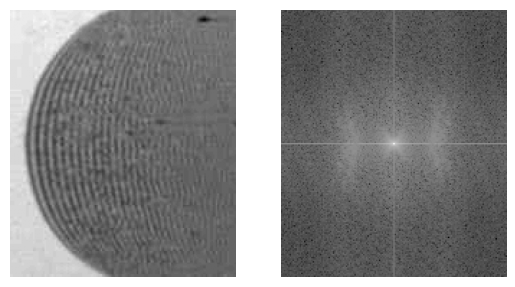

In [90]:
ft_img = calculate_2dft(img)

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(img)
plt.axis("off")
plt.subplot(122)
plt.imshow(np.log(abs(ft_img)))
plt.axis("off")
plt.show()

(186, 157)


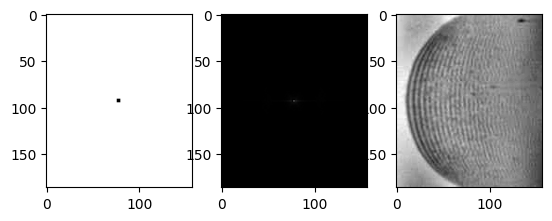

In [95]:
shape = ft_img.shape

print(shape)
mask = np.ones(shape)

center = (int((shape[0])/2), int((shape[1])/2))
h, w = (2,2)

#print(center[0]-h,center[0]+h, center[1]-w,center[1]+w, sep="\n")
mask[center[0]-h:center[0]+h, center[1]-w:center[1]+w] = 0.1

ft_masked = ft_img*mask

ift_img = calculate_2dift(ft_masked)

plt.set_cmap("gray")

plt.subplot(131)
plt.imshow(mask)

plt.subplot(132)
plt.imshow(abs(ft_masked))

plt.subplot(133)
plt.imshow(ift_img)
plt.show()

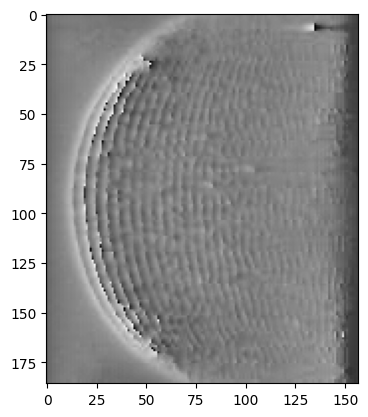

In [98]:
phase_portrate = []

for sig in ift_img:
    anal_sig = signal.hilbert(np.real(sig))
    inst_phase = np.angle(anal_sig)
    phase_portrate.append(inst_phase)

phase = np.array(phase_portrate)

plt.imshow(phase)
plt.show()